In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame
from sklearn import metrics

<ipython-input-1-cca28a0120f6>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


**Part 1: Arima model without train test split**

     date  new_cases  outliers
0  1/3/20          0         0
1  1/4/20          0         0
2  1/5/20          0         0
3  1/6/20          0         0
4  1/7/20          0         0


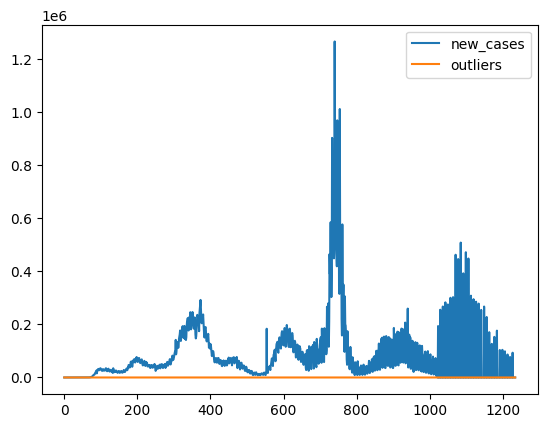

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usa-covid-new.csv', parse_dates=True)
df = df.fillna(0)
print(df.head())
df.plot()
pyplot.show()

In [ ]:
def adfuller_test(new_cases):
    result=adfuller(new_cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

# if p-value <= 0.05:
#     print("Data is stationary")
# else:
#     print("it is non-stationary ")

adfuller_test(df['new_cases'])

ADF Test Statistic : -4.228028444829591
p-value : 0.0005905004629819159
#Lags Used : 20
Number of Observations : 1214


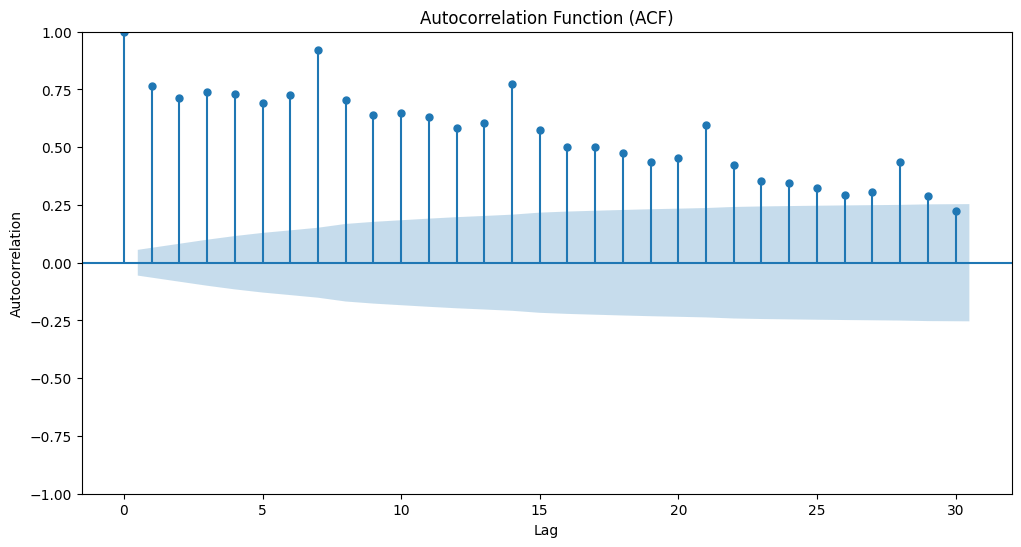

In [ ]:
# Plot ACF
fig, ax = pyplot.subplots(figsize=(12, 6))
plot_acf(df['new_cases'], lags=30, ax=ax)
pyplot.xlabel('Lag')
pyplot.ylabel('Autocorrelation')
pyplot.title('Autocorrelation Function (ACF)')
pyplot.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


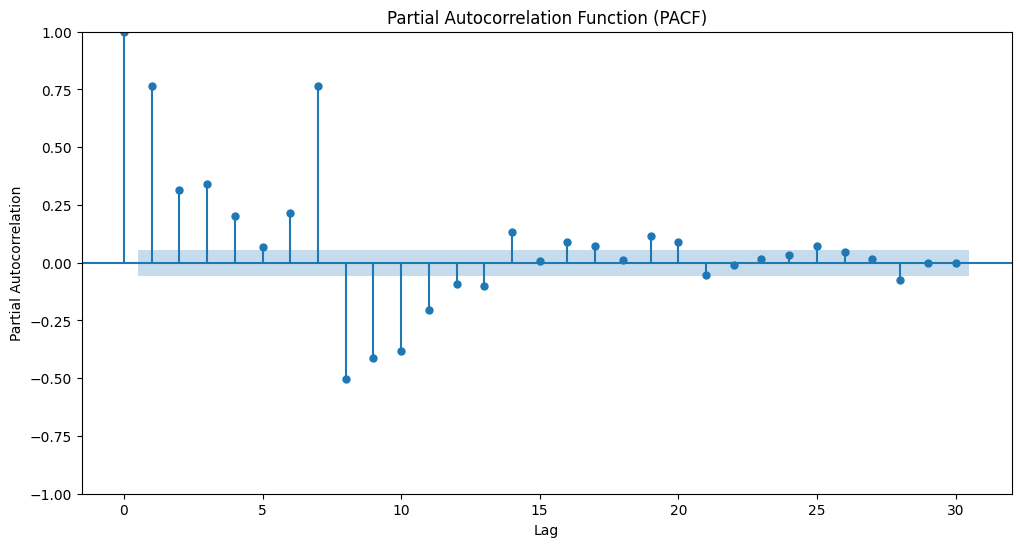

In [ ]:
# Plot PACF
fig, ax = pyplot.subplots(figsize=(12, 6))
plot_pacf(df['new_cases'], lags=30, ax=ax)
pyplot.xlabel('Lag')
pyplot.ylabel('Partial Autocorrelation')
pyplot.title('Partial Autocorrelation Function (PACF)')
pyplot.show()

In [ ]:
model=ARIMA(df['new_cases'],order=(5,0,2))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_cases   No. Observations:                 1235
Model:                 ARIMA(5, 0, 2)   Log Likelihood              -15402.320
Date:                Thu, 08 Jun 2023   AIC                          30822.640
Time:                        04:22:38   BIC                          30868.710
Sample:                             0   HQIC                         30839.970
                               - 1235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.375e+04   3.02e+04      2.776      0.006    2.46e+04    1.43e+05
ar.L1         -0.2277      0.028     -8.249      0.000      -0.282      -0.174
ar.L2         -0.2599      0.017    -15.538      0.000      -0.293      -0.227
ar.L3          0.5964      0.013     46.486      0.000       0.571       0.622
ar.L4          0.5754      0.016     35.990      0.000       0.544       0.607
ar.L5          0.0909      0.021      4.283      0.000       0.049       0.133
ma.L1          0.6854      0.019     35.181      0.000       0.647       0.724
ma.L2          0.8550      0.016     54.685      0.000       0.824       0.886
sigma2      4.766e+09      3.854   1.24e+09      0.000    4.77e+09    4.77e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             19251.33
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              27.55   Skew:                             2.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.13e+23. Standard errors may be unstable.
"""

<Axes: >

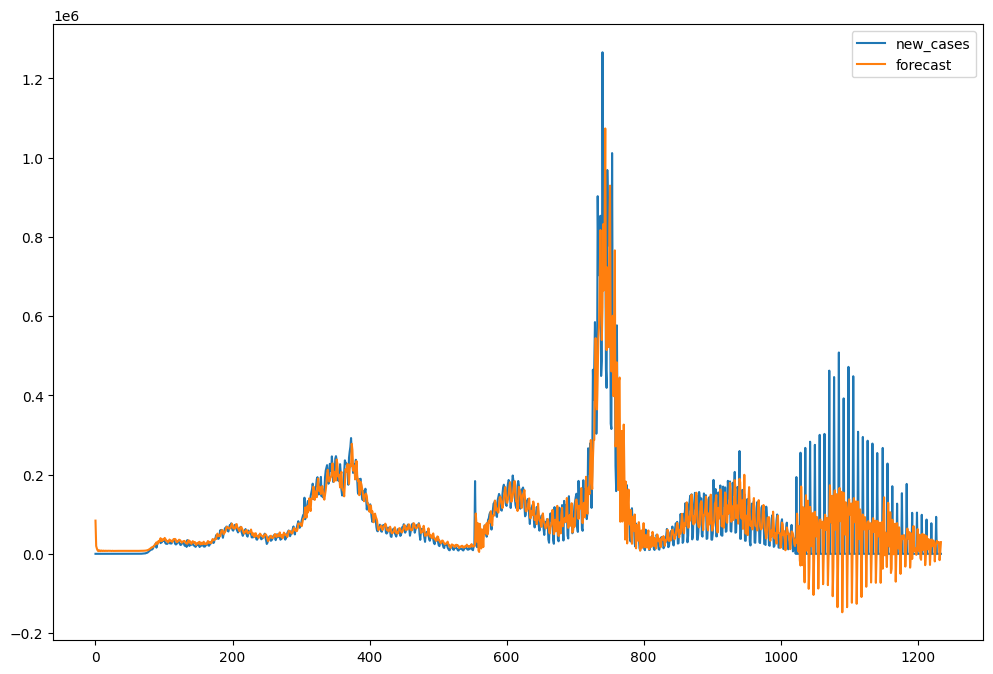

In [ ]:
df['forecast']=model_fit.predict(dynamic=False)
df[['new_cases','forecast']].plot(figsize=(12,8))

0       83754.517408
1       19728.869202
2       13489.500245
3        9026.083146
4        6814.593714
            ...     
1230    26811.905265
1231    29764.874572
1232   -16007.672420
1233     4359.300991
1234    29533.106614
Length: 1235, dtype: float64


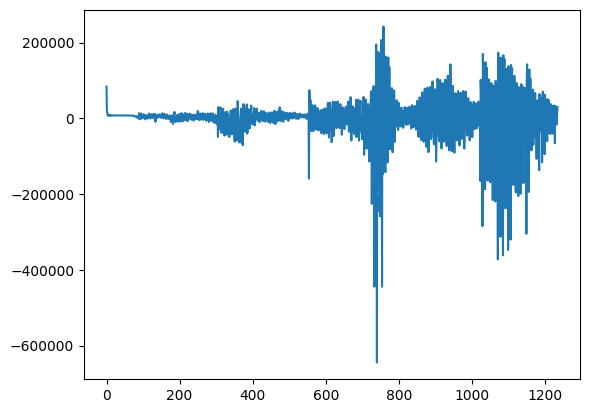

In [ ]:
# Calculate the residuals
residuals = df['forecast'] - df['new_cases']
print(residuals)
# Plot the residuals
pyplot.plot(residuals)
pyplot.show()

In [ ]:
# Identify the anomalies
threshold = 2 * np.std(residuals)
# threshold = 100 * df['outliers'].value_counts()[1] / df['outliers'].value_counts()[0]
# print(threshold)
anomalies = np.where(np.abs(residuals) > threshold)[0]

# Print the anomalies
print(anomalies)

[ 554  726  728  729  733  734  735  738  740  742  744  745  747  748
  749  751  752  753  754  756  758  760  763  765  771  774  941 1023
 1029 1030 1036 1037 1040 1043 1050 1057 1064 1071 1072 1075 1078 1079
 1082 1083 1085 1086 1089 1090 1092 1095 1097 1099 1100 1103 1106 1107
 1110 1111 1113 1120 1127 1134 1141 1149 1151 1156 1157 1184]


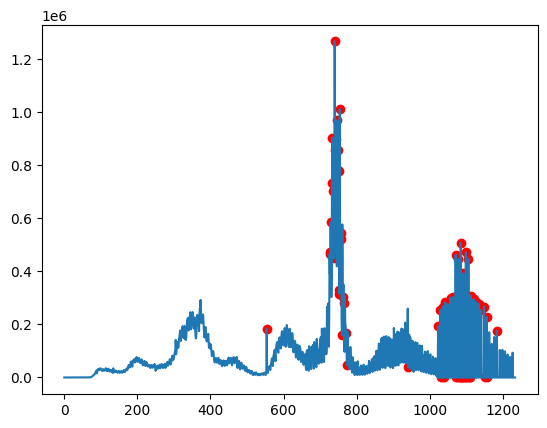

In [ ]:
# # Plot the anomalies
pyplot.plot(df['new_cases'])
pyplot.scatter(anomalies, df['new_cases'].iloc[anomalies], c='red')
pyplot.show()

In [ ]:
df['predicted'] = np.where(df.index.isin(anomalies), 1, 0)
precision = metrics.precision_score(df['outliers'], df['predicted'])
f1 = metrics.f1_score(df['outliers'], df['predicted'])
accuracy = metrics.accuracy_score(df['outliers'], df['predicted'])
print(precision, f1, accuracy)

0.36764705882352944 0.3937007874015748 0.9376518218623482


**Part 2: Arima model with train test split**

In [ ]:
series = read_csv('/content/drive/MyDrive/Colab Notebooks/usa-covid-new.csv', header=0, index_col=0, squeeze=True)
series = series.fillna(0)
# split into train and test sets
X = series['new_cases'].values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,0,2))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
#  print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

<ipython-input-12-5fccda4f63c9>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/Colab Notebooks/usa-covid-new.csv', header=0, index_col=0, squeeze=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 101718.791


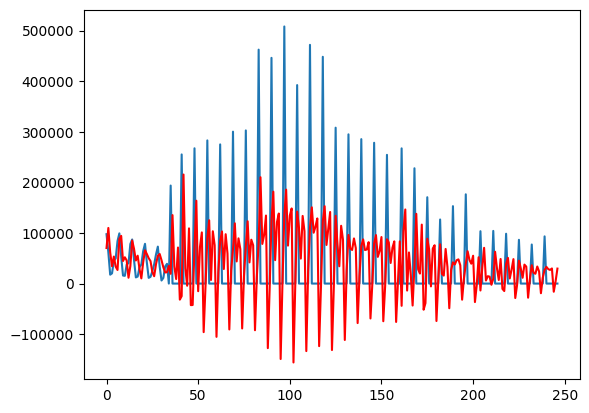

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

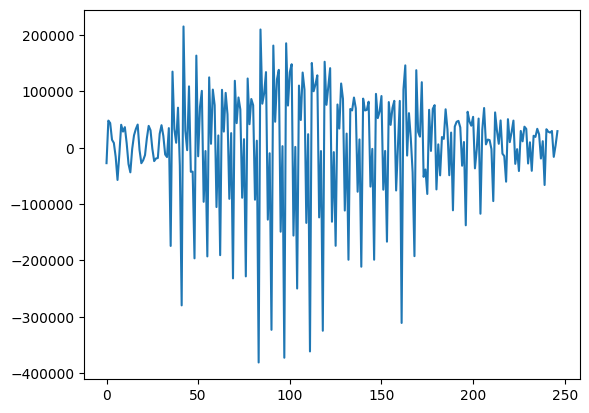

In [ ]:
# Calculate the residuals
residuals = predictions - test

# Plot the residuals
pyplot.plot(residuals)
pyplot.show()

In [ ]:
X = series['outliers'].values
size = int(len(X) * 0.80)
test_outliers = X[size:len(X)]
test_df_outliers = DataFrame(test_outliers,columns=['outliers'])
test_df_outliers['predicted'] = np.where(test_df_outliers.index.isin(anomalies), 1, 0)
# threshold = test_df_outliers['outliers'].value_counts()[1] / test_df_outliers['outliers'].value_counts()[0]
# threshold = 190000

[ 35  36  41  42  45  48  49  55  56  58  60  62  63  69  70  76  77  83
  84  87  88  90  91  93  94  95  97  98 100 101 102 104 105 107 108 109
 111 112 114 115 116 118 119 121 122 123 125 128 130 132 139 146 153 161
 162 163 168 169 172 189 196 204]


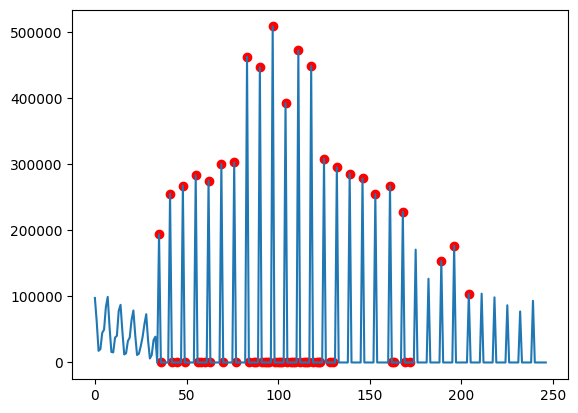

In [ ]:
# Identify the anomalies
threshold = np.std(residuals)
anomalies = np.where(np.abs(residuals) > threshold)[0]

# Print the anomalies
print(anomalies)
test_df = DataFrame(test)
pyplot.plot(test_df)
pyplot.scatter(anomalies, test_df.iloc[anomalies], c='red')
pyplot.show()

In [ ]:
precision = metrics.precision_score(test_df_outliers['outliers'], test_df_outliers['predicted'])
f1 = metrics.f1_score(test_df_outliers['outliers'], test_df_outliers['predicted'])
accuracy = metrics.accuracy_score(test_df_outliers['outliers'], test_df_outliers['predicted'])
print(precision, f1, accuracy)

0.0 0.0 0.8623481781376519


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
